---

# k-nearest neighbors algorithm(k-nn, k 최근접 이웃)
2017.12.02 <br>
박지훈

---

__k-nearest neighbors(k-nn, k 최근접 이웃)__: 분류나 회귀에 사용되는 비모수 방식의 알고리즘이다. 분류를 해야하는 새로운 데이터가 들어왔을때 어떤 그룹에 속하는지 판단한다. 기본적으로 어느 그룹에 가까운지를 판단하여 분류를 수행한다. 이를 위해 k라는 하이퍼 파라미터를 설정하는데 이는 분류해야하는 데이터로부터 k번째로 가까운 데이터를 추출할때 사용된다. 첫번째 부터 k번째로 가까운 데이터를 가지고 그 데이터들이 어느 그룹에 속해있는지로 새로운 데이터의 그룹을 판단한다. <br>

__유클리드거리__: 좌표평면상에서 두 점의 거리를 구할때 사용되는 방식이다. 이를 수행할때 정규화를 실시하면 나은 결과를 얻을 수 있다. 

---

In [104]:
# import packagae
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# generage sample data
data_1 = np.random.normal(10, 5, [10, 3]) # 샘플데이터 1
data_0 = np.random.normal(-10, 5, [10, 3]) # 샘플데이터 0

data_1[:, 2] = 1 # 라벨 1
data_0[:, 2] = 0 # 라벨 0

dataset = np.vstack((data_1, data_0)) # 데이터 병합

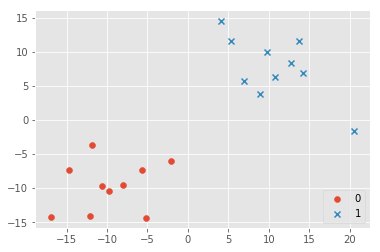

In [115]:
# visualization
plt.style.use("ggplot")
plt.scatter(data_0[:, 0], data_0[:, 1], label="0", marker="o")
plt.scatter(data_1[:, 0], data_1[:, 1], label="1", marker="x")
plt.legend(loc="lower right")
plt.show()

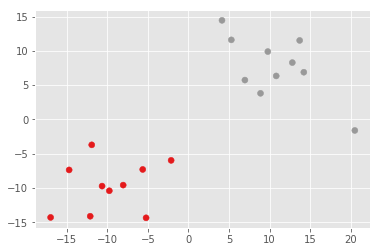

In [116]:
plt.scatter(dataset[:, 0], dataset[:, 1], c=dataset[:, 2], cmap="Set1")
plt.show()

In [117]:
# k-nn 구현
def KNN(dataset, K, class_data):
    label = dataset[:, -1]
    row_len = dataset.shape[0]
    col_len = dataset.shape[1]
    
#    tile = np.tile(class_data, row_len).reshape(row_len, col_len)
    
#    dist_1 = np.sum((dataset[:, :-1]-tile)**2, 1)
    dist = np.sum((dataset[:, :-1]-class_data)**2, 1)

    vote = {1:np.count_nonzero(label[dist.argsort()][:K]), 0:K-np.count_nonzero(label[dist.argsort()][:K])}
    result = max(vote, key=vote.get)
    
    return vote, result

In [118]:
vote, result = KNN(dataset, 3, [2, 2])

In [119]:
KNN(dataset, 3, [2, 2])

({0: 1, 1: 2}, 1)

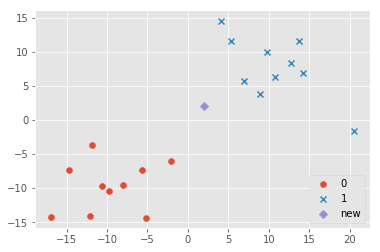

In [120]:
plt.scatter(data_0[:, 0], data_0[:, 1], label="0", marker="o")
plt.scatter(data_1[:, 0], data_1[:, 1], label="1", marker="x")
plt.scatter(2, 2, label="new", marker="D")
plt.legend(loc="lower right")
plt.show()